In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


Differenced?  d=0



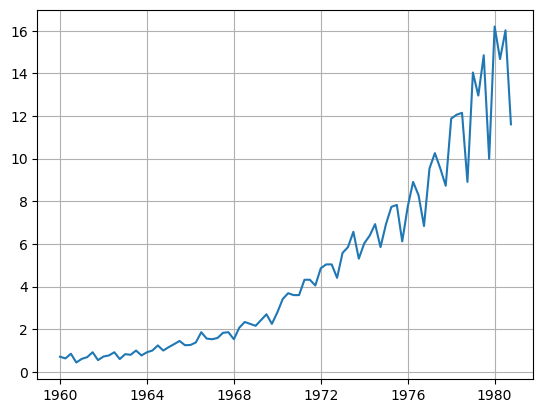

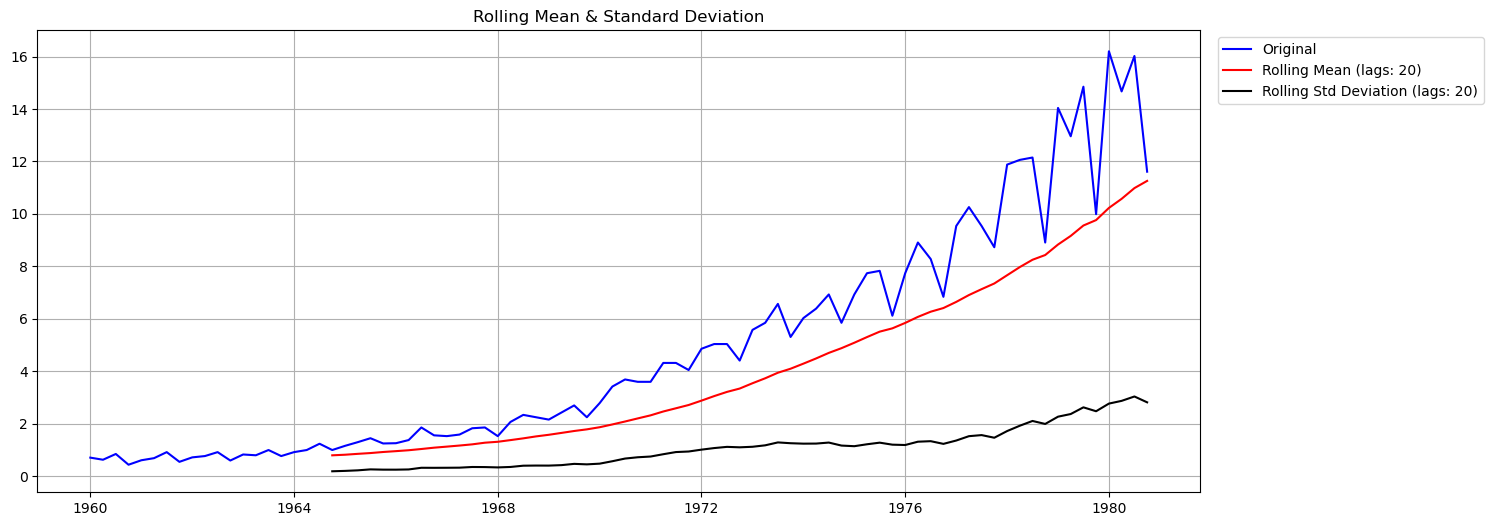

In [17]:
import sys 
sys.path.append('../../My-Code/')
import omdutils as omd
import timetools as tt

df_jj = omd.from_postgres('select * from johnson_and_johnson', 'Datasets')
df_jj['date'] = pd.to_datetime(df_jj['date'])
df_jj.set_index(['date'], inplace=True)
tt.plot_for_stationary(df_jj)

In [3]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


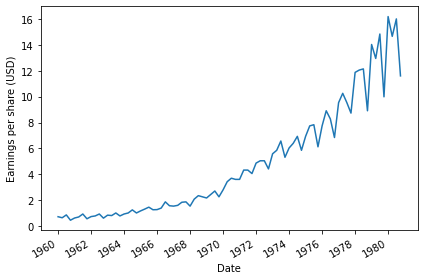

In [4]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)

In [5]:
advanced_decomposition = STL(df.data, period=4).fit()

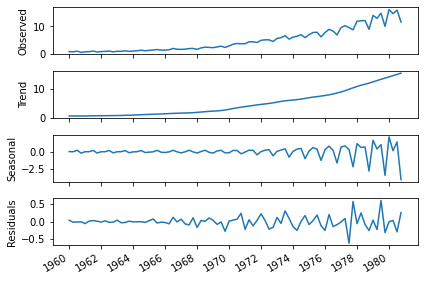

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F02_peixeiro.png', dpi=300)

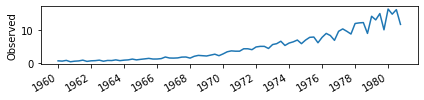

In [7]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F03_peixeiro.png', dpi=300)

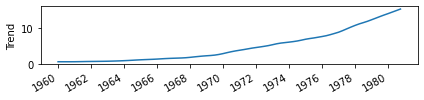

In [8]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F04_peixeiro.png', dpi=300)

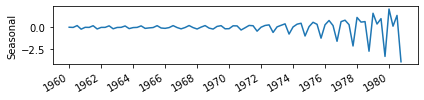

In [9]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F05_peixeiro.png', dpi=300)

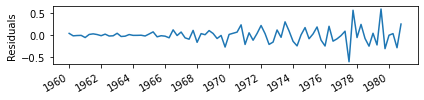

In [10]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F06_peixeiro.png', dpi=300)

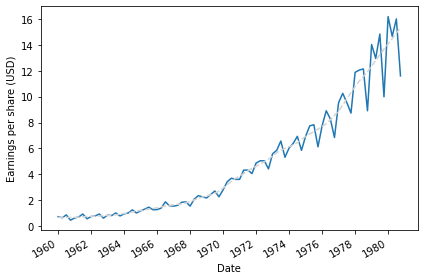

In [12]:
# fig, ax = plt.subplots()

# ax.plot(df.date, df.data)
# ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
# ax.set_xlabel('Date')
# ax.set_ylabel('Earnings per share (USD)')

# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# fig.autofmt_xdate()
# plt.tight_layout()

# plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)